# SyriaTel Customer Churn Analysis 

## Overview

SyriaTel, a telecommunications company in Syria, has noticed that some of their customers have begun discontinuing their service, leading to churn. This analysis aims to identify the features that predict whether a customer is likely to discontinue their service.


## <small> Business Understanding</small>


### <small> Introduction</small>



A common recurring challenge seen in the telecom sector for Syria Tel is customer loss. This paper thus presents an investigation into the details and factors leading to the loss of customers by Syria Tel users. This tool leverages machine learning techniques to develop a forecasting model to identify behavioral patterns and precursors to customer disloyalty. These align with having a predictive model that should give early warnings about the likelihood of customer churn incidents so that Syria Tel could act early enough to forestall them. In addition, the project moves on the prediction level to provide actionable strategies that will equip Syria Tel stakeholders with data-driven interventions, refine the quality of offered services, nurture enduring customer connections, and augment the company's competitive positioning in the telecommunications space. This analysis aims to demystify the complexity of customer churn, allowing Syria Tel to move into a proactive retention strategy and ensure further development.


### <small>  Problem Statement</small>


Syria Tel, being one of the leading firms in telecommunications, faces a very crucial problem: customer churn. This involves customers stopping services with their company, which is deteriorating the company's sustainability and revenue. The issue was to be able to forecast who and when to leave and, more importantly, why to go. It is the wish of Syria Tel not to have this happen and to have their customers satisfied.


### <small> Main Objective</small>


To apply classification modeling techniques to analyze customer churn data for Syria Tel, with the aim of identifying and quantifying the key factors that contribute to customer churn.


### <small> Subjective Objectives</small>


1. Classification Data Discovery:
Go through the dataset acquired and understand the relations among different features with the target variable, customer churn. Find out essential features that might play a critical role in predicting churn, considering different categorical and numerical features.

2. Create a Churn Prediction Classification Model: 
Build a churn prediction classification model that can be implemented using models such as Logistic Regression, Random Forest, or XGBoost. Choose the correct independent variables (features) that can affect churn; for example, the use of an international plan, minutes of incoming and outgoing calls, or calls to customer services.

3. Feature Importance and Effects Analysis: 
Analyze the importance of independent features in churn prediction. Identify the most essential features that contribute to predicting customer churn based on coefficients of the model, importance scores of features, or another metric.

4. Assess Model Performance and Reliability: 
Evaluate the performance of the classification model using metrics such as accuracy, precision, recall, and a confusion matrix. Ensure that the model is reliable and does indeed perform in a way that should predict customer churn.

5. Offer Practical Insights and Recommendations: 
Elaborate on practical insights and recommendations based on the findings of the classification model. Advise telecom companies on the factors that will mitigate customer loss. This will help highlight influential features and what they imply for churn to make better decisions on retention vs. exit, service optimization, or improvements in customer service.



### <small>  Data Understanding</small>


Dataset Features Include:

- **State:** The customer's state of residence.
- **Account Length:** The duration of the customer's account in days.
- **Area Code:** The area code associated with the customer.
- **Phone Number:** The customer's phone number.
- **International Plan:** True if the customer has an international plan, otherwise False.
- **Voice Mail Plan:** True if the customer has a voicemail plan, otherwise False.
- **Number Vmail Messages:** The number of voicemails the customer has sent.
- **Total Day Minutes:** The total number of minutes the customer spent on calls during the day.
- **Total Day Calls:** The total number of calls the customer made during the day.
- **Total Day Charge:** The total amount of money charged by the Telecom company for calls during the day.
- **Total Eve Minutes:** The total number of minutes the customer spent on calls during the evening.
- **Total Eve Calls:** The total number of calls the customer made during the evening.
- **Total Eve Charge:** The total amount of money charged by the Telecom company for calls during the evening.
- **Total Night Minutes:** The total number of minutes the customer spent on calls during the night.
- **Total Night Calls:** The total number of calls the customer made during the night.
- **Total Night Charge:** The total amount of money charged by the Telecom company for calls during the night.
- **Total Intl Minutes:** The total number of minutes the customer spent on international calls.
- **Total Intl Calls:** The total number of international calls the customer made.
- **Total Intl Charge:** The total amount of money charged by the Telecom company for international calls.
- **Customer Service Calls:** The number of calls the customer made to customer service.
- **Churn:** True if the customer terminated their contract, otherwise False.

##  Reading the data


In [100]:
# Importing the necessary libraries 
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations and array manipulation
import matplotlib.pyplot as plt #Data Visualisation
%matplotlib inline
import warnings
import seaborn as sns # for enhanced visualisation
from sklearn.model_selection import train_test_split #for splitting our data into training and testing sets
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics # For model evaluation and performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix # for evaluation of models

warnings.filterwarnings("ignore")

In [101]:
# Loading the dataset
df = pd.read_csv('/Users/mitchmathiu/Phase 3 project/SyriaTel-Customer-Churn/bigml_59c28831336c6604c800002a.csv')
# Preview the shape of the dataset
print('Dataframe shape {}'.format(df.shape))

Dataframe shape (3333, 21)


# Data Exploration


In [102]:
#  Creating a class for exploring and analyzing Pandas DataFrames.
class DataExplorer:
    def __init__(self, data):
        """
        Initialize the DataExplorer class with a dataset.
        :param data: Pandas DataFrame
        """
        self.data = data
        
    def check_head(self, rows=5):
        """
        Display the first few rows of the dataset.
        :return: Pandas DataFrame showing the head of the dataset
        """
        return self.data.head(rows)
    
    def check_info(self):
        """
        Display information about the dataset (data types, memory usage, etc.).
        """
        return self.data.info()
    
    def check_describe(self):
        """
        Generate descriptive statistics of the dataset (count, mean, etc.).
        :return: Pandas DataFrame with descriptive statistics
        """
        return self.data.describe()
    

In [103]:
# Instantiate the DataExplorer class
explorer = DataExplorer(df)

# Display the head of the dataset
print("Dataset Head:")
print(explorer.check_head())

# Display dataset information
print("\nDataset Information:")
explorer.check_info()

# Display dataset statistics
print("\nDataset Statistics:")
print(explorer.check_describe())


Dataset Head:
  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  

In [104]:
# Summary statistics for categorical columns in DataFrame 'df'
df.describe(include='O')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


# Data Cleaning


Data Prep
This section prepares the data for EDA and modeling. The dataset will be checked for:

- duplicated rows
- missing values
- Columns not needed in the analysis

In [105]:
# Checking for null values
pd.DataFrame(df.isnull().sum()).T


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [107]:
# Checking for duplicate Values
df.duplicated().sum()

0

The data has no missing or duplicate values


In [108]:
df.drop(['phone number'], inplace=True, axis=1)


# Explarotary Data Analysis

### Univariate Analysis


The dataset has both numerical and categorical variables 
Let's explore them separetly 

## 1. Categorical Variables


In [109]:
# extract the categorical variables in the dataset
categorical = [ cat for cat in df.columns if df[cat].dtypes=='O']
print('List of categorical variables {}'.format(categorical))

List of categorical variables ['state', 'international plan', 'voice mail plan']


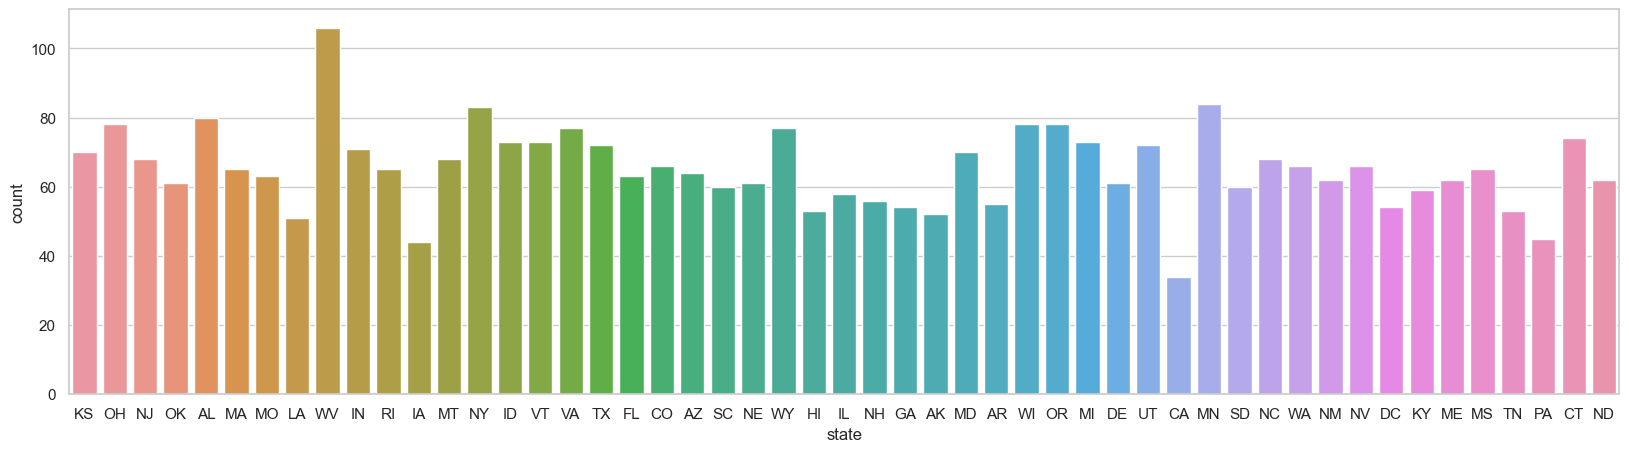

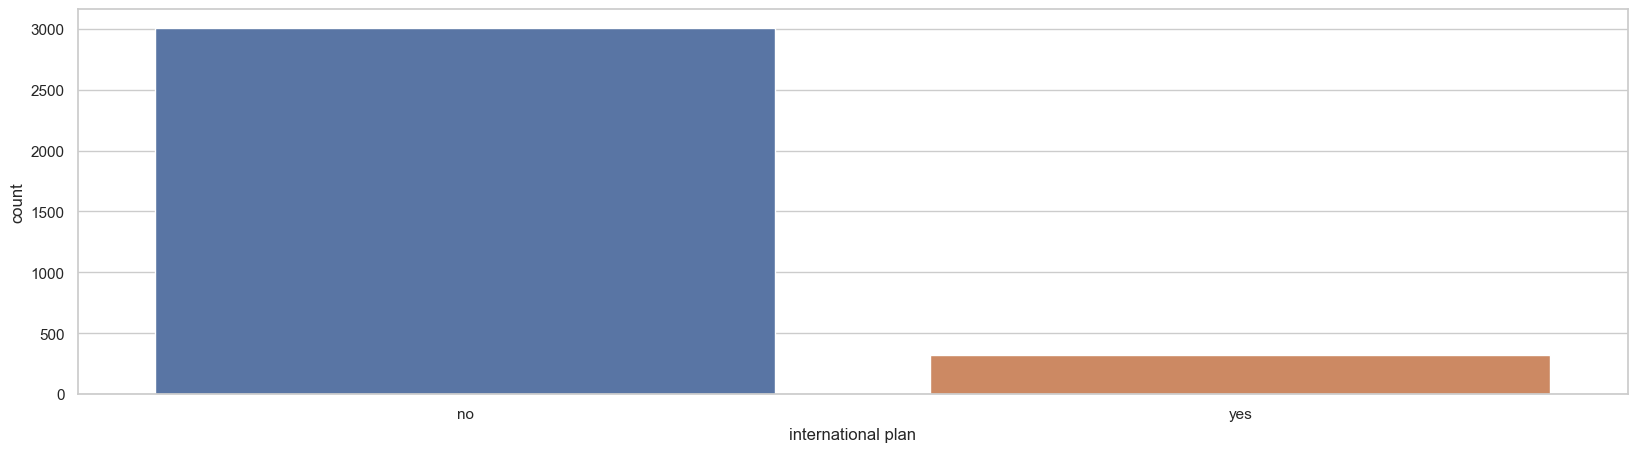

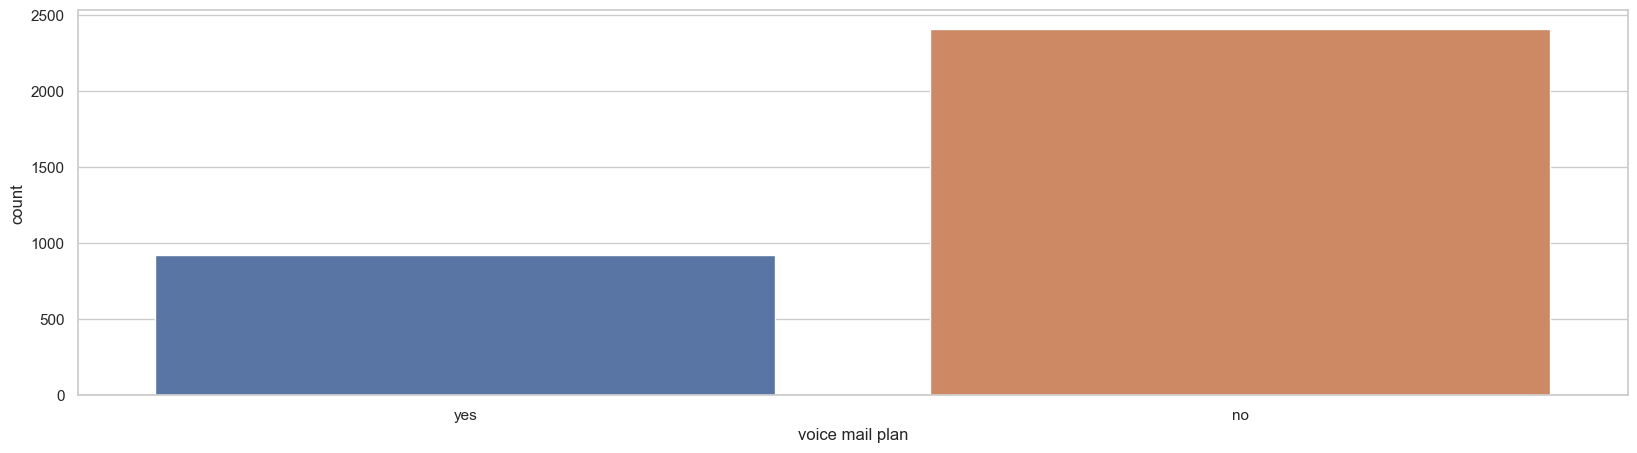

In [110]:
# plotting all the categorical variable 
for feature in categorical:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(df)
    ax = sns.countplot(x=feature, data=df)
    plt.show()

## Checking Outliers


## 2. Numerical Variables


In [111]:
# Extracting the numerical variables from the data
# extract the categorical variables in the dataset
numerical_variables = [ cat for cat in df.columns if df[cat].dtypes !='O']
print('List of categorical variables {}'.format(categorical))

List of categorical variables ['state', 'international plan', 'voice mail plan']


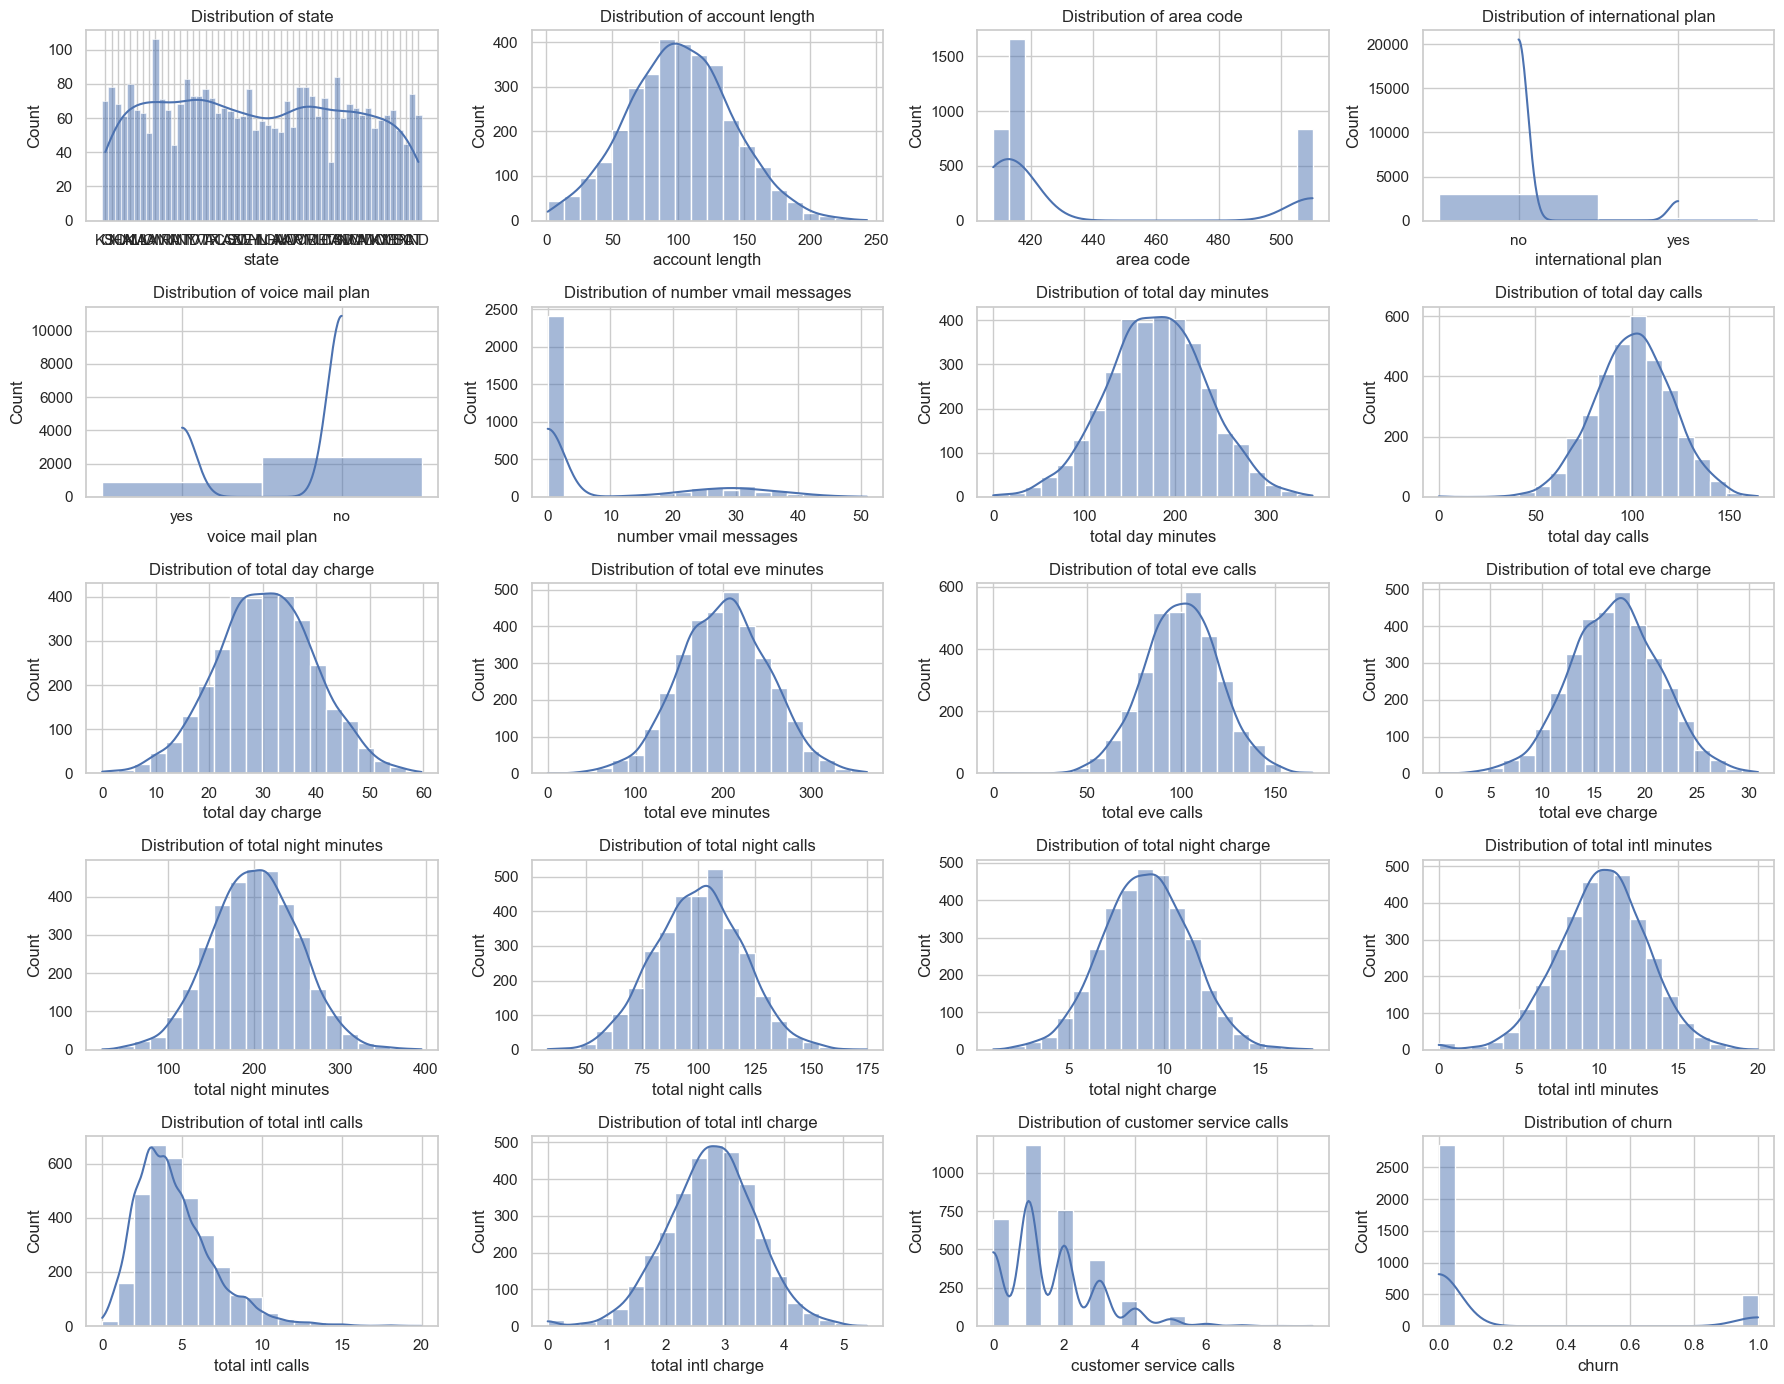

In [112]:
# Define the numerical variables to plot
numerical_variables = df.columns.tolist()

# Define the number of rows and columns for subplots
rows = 5  # Number of rows for subplots
cols = 4  # Number of columns for subplots

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 14))
axes = axes.ravel()  # Flatten the 2D array of subplots into a 1D array

# Plot the histograms
for i, column in enumerate(numerical_variables):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Turn off unused subplots
for i in range(len(numerical_variables), rows * cols):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

conclusion 

# BiVariate Analysis


Several features display a perfect positive correlation:

- Total day charge is perfectly correlated with total day minutes.
- Total evening charge is perfectly correlated with total evening minutes.
- Total night charge is perfectly correlated with total night minutes.
- Total international charge is perfectly correlated with total international minutes.

In [113]:
# Checking for relationsip between churn and international plan
int_plan_churn = pd.DataFrame(df.groupby(['international plan'])['churn'].mean())
int_plan_churn


,churn
international plan,
no,0.114950
yes,0.424149


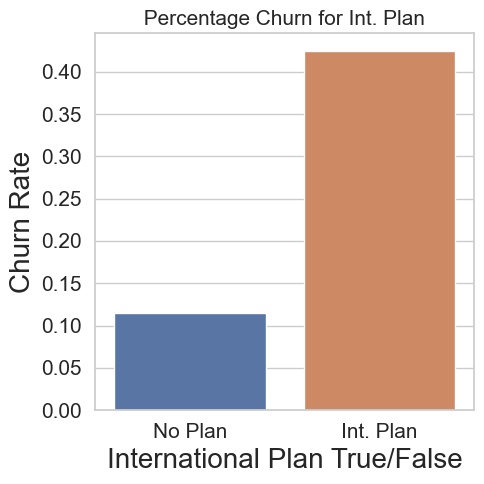

In [114]:
# Visualizing
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x = [0, 1], y = 'churn', data = int_plan_churn, ax = ax)
plt.title(' Percentage Churn for Int. Plan ', fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('International Plan True/False', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
ax.set_xticklabels(['No Plan', 'Int. Plan'])
plt.tight_layout()

conclusion

## Data Preprocessing

In [115]:
# Convert the churn values to 0 and 1
df['churn'] = df['churn'].map({True: 1, False: 0})
# Previewing the changes
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


churn
0    2850
1     483
Name: count, dtype: int64


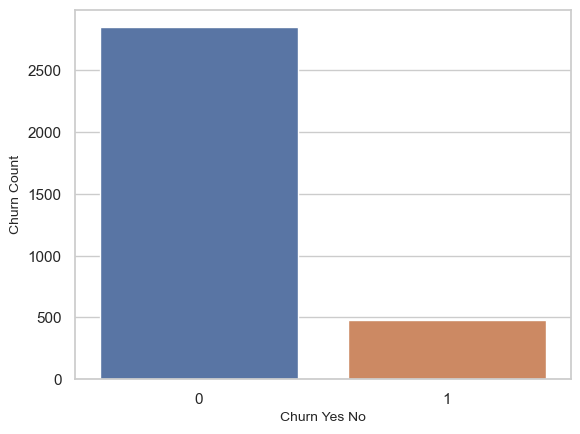

In [116]:
print(df['churn'].value_counts())
sns.countplot(data=df,x='churn')
plt.xlabel('Churn Yes No', fontsize = 10)
plt.ylabel('Churn Count', fontsize = 10)
plt.show()

In [117]:
# Converting yes and no from columns to 0 and 1 
yes_no_to_binary = {'no': 0, 'yes': 1}

# Applying mapping to 'international plan' and 'voice mail plan'
df['international plan'] = df['international plan'].map(yes_no_to_binary)
df['voice mail plan'] = df['voice mail plan'].map(yes_no_to_binary)
# Previewing the changes
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [118]:
# Encoding the state column
# We use hashing encoder as the states are 51 and we want a minimal number of rows
import category_encoders as ce

hash_encoder = ce.HashingEncoder(cols='state')

df = hash_encoder.fit_transform(df)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/mitchmathiu/anaconda3/envs/projectlast/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/mitchmathiu/anaconda3/envs/projectlast/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/mitchmathiu/anaconda3/envs/projectlast/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/mitchmathiu/anaconda3/envs/projectlast/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/mitchmathiu/anaconda3/envs/projectlast/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/mitchmathiu/anaconda3/envs/projectlast/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/mitchmathiu/anaconda3/envs/projectlast/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/mitchmathiu/anaconda3/envs/projectlast/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [119]:
# Scaling the numerical columns
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)

In [120]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


## Modelling

In [121]:
# Splitting the data
X = df.drop(['churn'],axis=1)
y = df['churn']
# We use 25% of the data on training and a random state of 42
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.25,random_state=42)

## Baseline Model


In [122]:
# We first begin by Logistic Regression as the baseline model
lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test) 


In [123]:
# Evaluating the baseline model
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred_lr)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred_lr)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred_lr)))

Accuracy: 
0.8663465386154462
Classification report: 
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2141
         1.0       0.61      0.19      0.29       358

    accuracy                           0.87      2499
   macro avg       0.74      0.58      0.61      2499
weighted avg       0.84      0.87      0.83      2499

Confusion Matrix
[[2097   44]
 [ 290   68]]


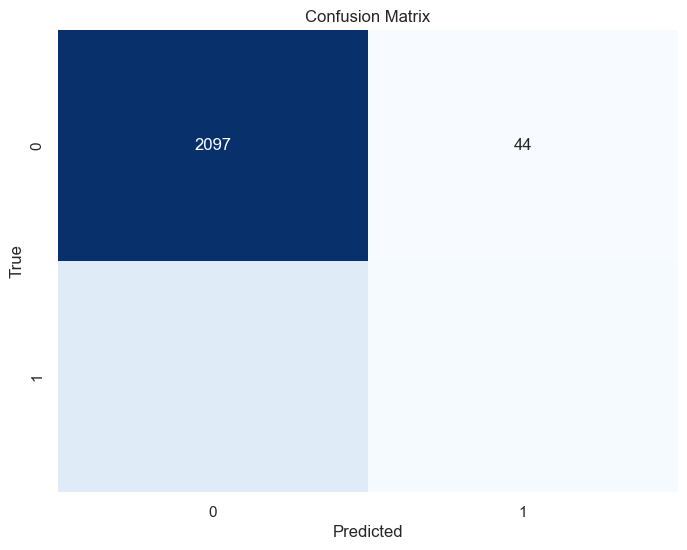

In [124]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: comment

## Random Forest Classifier


In [125]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [126]:
# Evaluation of the random forest model
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred_rfc)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred_rfc)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred_rfc)))

Accuracy: 
0.9295718287314926
Classification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      2141
         1.0       0.89      0.58      0.70       358

    accuracy                           0.93      2499
   macro avg       0.91      0.79      0.83      2499
weighted avg       0.93      0.93      0.92      2499

Confusion Matrix
[[2114   27]
 [ 149  209]]


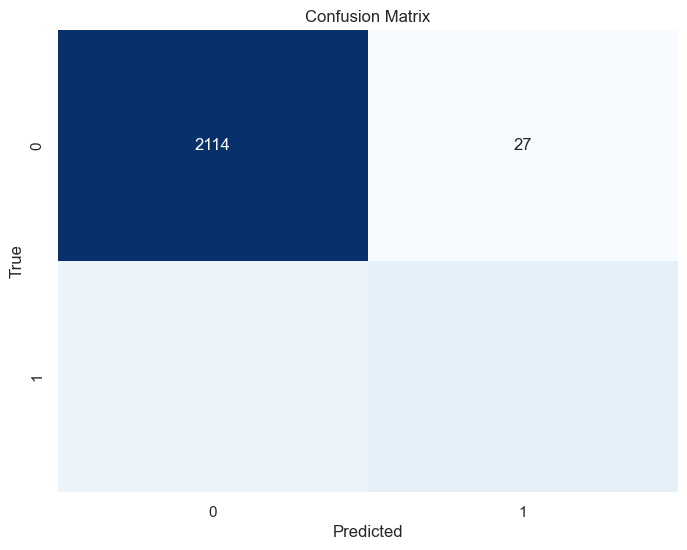

In [127]:
conf_matrix = confusion_matrix(y_test, y_pred_rfc)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [128]:
# Tuning the Random Forest Classifier Model
# Define the grid of hyperparameters to search
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 5, 10, 15],   # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}
# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate model performance on test set
accuracy = best_estimator.score(X_test, y_test)

In [129]:
# Checking the evaluation metrics 
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9223689475790317


# Ensemble Method


## XGBoost


In [130]:
clf = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.7, 
                        subsample=0.8, nthread=10, learning_rate=0.01)
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

# Checking for the evaluation metrics 
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred_clf)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred_clf)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred_clf)))

Accuracy: 
0.9203681472589036
Classification report: 
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      2141
         1.0       0.90      0.50      0.64       358

    accuracy                           0.92      2499
   macro avg       0.91      0.75      0.80      2499
weighted avg       0.92      0.92      0.91      2499

Confusion Matrix
[[2120   21]
 [ 178  180]]


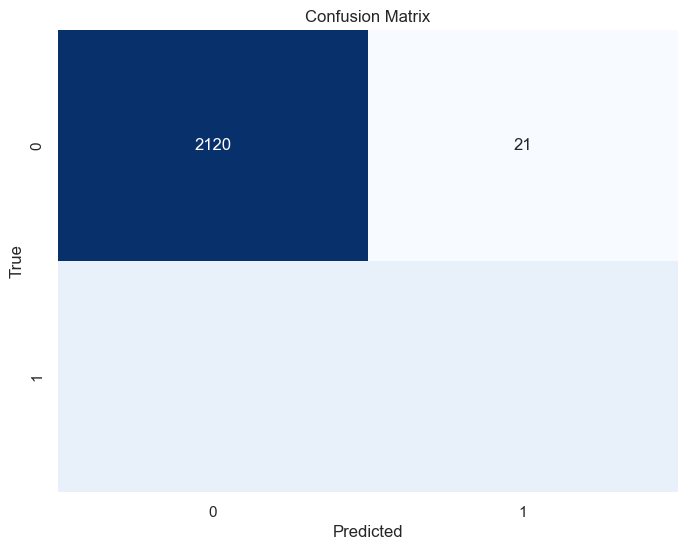

In [131]:
conf_matrix = confusion_matrix(y_test, y_pred_clf)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Model Pipeline


In [132]:
from sklearn.pipeline import Pipeline
# Define a pipeline including preprocessing and model evaluation
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Include any necessary preprocessing steps here
    ('classifier', XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.7, 
                                 subsample=0.8, nthread=10, learning_rate=0.01))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9203681472589036
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      2141
         1.0       0.90      0.50      0.64       358

    accuracy                           0.92      2499
   macro avg       0.91      0.75      0.80      2499
weighted avg       0.92      0.92      0.91      2499

Confusion Matrix:
[[2120   21]
 [ 178  180]]


# Results
